In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np


In [2]:
#import and explore data
path = 'C:\PS_2019_2\input\card_dataset'
path_train = os.path.join(path,'train')
path_test = os.path.join(path,'test')
print(path_train)

train = pd.read_csv(os.path.join(path,'train_labels.csv'))
test = pd.read_csv(os.path.join(path,'test_labels.csv'))
print(train.shape)
print(test.shape)
print('_' * 49)
print(train.head())
print('_' * 100)
print(test.head())
print(train['class'].unique())

C:\PS_2019_2\input\card_dataset\train
(527, 8)
(143, 8)
_________________________________________________
          filename  width  height  class  xmin  ymin  xmax  ymax
0   cam_image1.jpg    480     270  queen   173    24   260   137
1   cam_image1.jpg    480     270  queen   165   135   253   251
2   cam_image1.jpg    480     270    ten   255    96   337   208
3  cam_image10.jpg    960     540    ten   501   116   700   353
4  cam_image10.jpg    960     540  queen   261   124   453   370
____________________________________________________________________________________________________
         filename  width  height class  xmin  ymin  xmax  ymax
0  cam_image2.jpg    960     540  king   312    30   485   249
1  cam_image2.jpg    960     540  king   514    24   694   245
2  cam_image2.jpg    960     540  king   305   263   489   519
3  cam_image2.jpg    960     540  king   515   267   704   523
4  cam_image4.jpg    960     540  jack   297    18   459   237
['queen' 'ten' 'nine' 'ki

In [3]:
height_crop_image = 250
weight_crop_image = 200
def create_data():
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    classes = ['queen', 'ten', 'nine', 'king', 'jack', 'ace']
    
    m_train = train.shape[0]
    m_test = test.shape[0]
    
    for i in range(m_train):
        row = train.iloc[i]
        img = cv2.imread(os.path.join(path_train, row['filename']))
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        c = row['class']
        
        y_train.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_train.append(crop_img)
    
    for i in range(m_test):
        row = test.iloc[i]
        img = cv2.imread(os.path.join(path_test, row['filename']))
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        c = row['class']
        
        y_test.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_test.append(crop_img)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test, classes
 
x_train_org, y_train_org, x_test_org, y_test_org, classes = create_data()
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)
print(classes)

(527, 250, 200, 3)
(527,)
(143, 250, 200, 3)
(143,)
['queen', 'ten', 'nine', 'king', 'jack', 'ace']


In [4]:
from tensorflow.keras.utils import to_categorical

x_train = x_train_org / 255.0
x_test = x_test_org / 255.0
y_train = to_categorical(y_train_org, 6)
y_test = to_categorical(y_test_org, 6)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [10]:
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D

#from tensorflow.keras.utils import np_utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
opt_rms = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [18]:
model.fit(x=x_train, y=y_train, epochs = 50, verbose = 1,
         validation_data=(x_test,y_test))

Train on 527 samples, validate on 143 samples
Epoch 1/50
527/527 [==============================] - 318s 603ms/step - loss: 1.7506 - acc: 0.8899 - val_loss: 3.0382 - val_acc: 0.8112
Epoch 2/50
527/527 [==============================] - 315s 597ms/step - loss: 1.6875 - acc: 0.8899 - val_loss: 7.6462 - val_acc: 0.4895
Epoch 3/50
527/527 [==============================] - 317s 601ms/step - loss: 1.3546 - acc: 0.9108 - val_loss: 3.3778 - val_acc: 0.7832
Epoch 4/50
527/527 [==============================] - 314s 597ms/step - loss: 1.1822 - acc: 0.9222 - val_loss: 7.0198 - val_acc: 0.5594
Epoch 5/50
527/527 [==============================] - 315s 597ms/step - loss: 1.4551 - acc: 0.9089 - val_loss: 6.5233 - val_acc: 0.5804
Epoch 6/50
527/527 [==============================] - 315s 597ms/step - loss: 1.3139 - acc: 0.9146 - val_loss: 3.1943 - val_acc: 0.7902
Epoch 7/50
527/527 [==============================] - 314s 596ms/step - loss: 1.2084 - acc: 0.9241 - val_loss: 4.8655 - val_acc: 0.6783
Ep

In [27]:
predictions = model.predict([x_test])

In [68]:
def index_to_str(index):
    if np.argmax(predictions[index]) == 0:
        print('Queen')
    if np.argmax(predictions[index]) == 1:
        print('Ten')
    if np.argmax(predictions[index]) == 2:
        print('Nine')
    if np.argmax(predictions[index]) == 3:
        print('King')
    if np.argmax(predictions[index]) == 4:
        print('Jack')
    if np.argmax(predictions[index]) == 5:
        print('Ace')

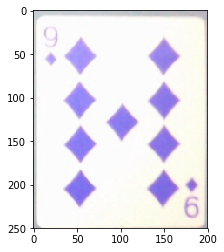

In [71]:
index=9

plt.imshow(x_test[index])

In [ ]:
index_to_str(9)

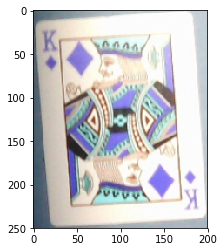

In [74]:
plt.imshow(x_test[10])

In [ ]:
index_to_str(10)

In [89]:
model.save('6_classes.h5')

In [5]:
model1 = tf.keras.models.load_model('6_classes.h5')
prediction1 = model1.predict([x_test])

def index_to_str1(index):
    if np.argmax(prediction1[index]) == 0:
        print('Queen')
    if np.argmax(prediction1[index]) == 1:
        print('Ten')
    if np.argmax(prediction1[index]) == 2:
        print('Nine')
    if np.argmax(prediction1[index]) == 3:
        print('King')
    if np.argmax(prediction1[index]) == 4:
        print('Jack')
    if np.argmax(prediction1[index]) == 5:
        print('Ace')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


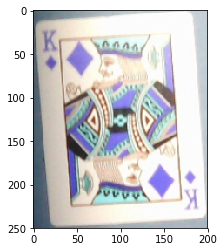

In [6]:
plt.imshow(x_test[10])

In [ ]:
index_to_str1(10)

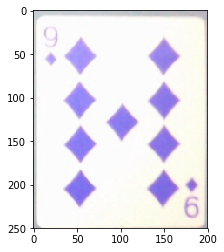

In [8]:
plt.imshow(x_test[9])

In [ ]:
index_to_str1(9)